In [1]:
#%reset

In [2]:
Errors =     ['021880.KQ', '090990.KS', '083590.KS', '021960.KS', '051170.KQ', '033430.KQ',
 '036500.KQ', '083580.KS', '073010.KQ', '065150.KQ', '090970.KS', '038340.KQ', '005620.KS', 
 '900050.KS', '047440.KQ', '225590.KQ', '204760.KQ', '058370.KQ', '171090.KQ', '011810.KS', 
 '101400.KQ', '039790.KQ', '087220.KQ', '001290.KS', '083620.KS', '174900.KQ', '083610.KS',
 '214310.KQ', '263750.KQ', '086830.KQ', '061460.KQ', '215090.KQ', '023430.KQ', '083570.KS', 
 '110570.KS', '053660.KQ', '032040.KQ', '090370.KS', '083390.KS', '091000.KS', '066430.KQ',
 '007190.KS', '263540.KQ', '090980.KS', '042660.KS', '117670.KQ', '204650.KQ', '068150.KQ',
 '900130.KQ', '083350.KS', '082920.KQ', '215750.KQ', '096690.KQ', '208870.KQ', '083360.KS', 
 '043580.KQ', '204440.KQ', '117930.KS', '083600.KS', '214150.KQ', '259630.KQ', '900180.KQ', 
 '109070.KS', '050320.KQ', '002550.KS']

<br></br>
## 1 38공모와 신규데이터 확인
Google 시트에 38.org 사이트의 새로운 기업 추가

In [1]:
# Code 중복여부 확인
import pandas as pd; from stock_init import stocks_38new
new_table = stocks_38new(); df_gsheet = pd.read_csv('./Sql/Gsheet.csv') # 저장 데이터 불러오기
codes = list(set(df_gsheet.Code)); result = []
for i , new_code in enumerate(new_table.Code):
    if i < 10: 
        if new_code not in codes:  result.append((i, new_code))
insert_code_lines = [idx[0]  for idx in result]; new_table.ix[insert_code_lines, :]  

www.38.co.kr 사이트 자료 수집중...


,기업명,Code,Shares


In [2]:
# Google 시트에 38.org 사이트의 새로운 기업목록 추가
import gspread; from oauth2client.service_account import ServiceAccountCredentials
scope = ['https://spreadsheets.google.com/feeds']
creds = ServiceAccountCredentials.from_json_keyfile_name('./Sql/My Project-a0ac700bc118.json',scope)
client = gspread.authorize(creds)        # API 연결인증
sheet = client.open('Code_Yahoo').sheet1 # G-sheet '시트이름' 연결
for i in insert_code_lines:  
    row = list(new_table.iloc[i,:])
    sheet.insert_row(row, i+2); print(i, " line is Inserted.. complete!")
print('Insert the Codes done...!!!!!')

1  line is Inserted.. complete!
2  line is Inserted.. complete!
Insert the Codes done...!!!!!


In [5]:
from stock_init import import_Gsheet
import_Gsheet()  # Gsheet.csv 새로 저장

Gsheet.csv Saved..


In [6]:
import pandas as pd
import datetime, time, pickle, os, zipfile, sys
df = pd.read_csv('./Sql/Gsheet.csv')
codes = list(set(df.Code))
codes = [code   for code in codes  if len(str(code)) == 9]
pickle.dump(codes , open('./Sql/codes.p','wb'))
print('done!')

done!


<br></br>
## 2 SQlite3의 Table List 확인
sqlite3 모듈을 직접활용하면 더 빠르다

In [14]:
import sqlite3; import pandas as pd
con = sqlite3.connect("./data//krxStock.db")
res = con.execute("SELECT name FROM sqlite_master WHERE type='table';")
dbnames = [name[0]  for name in res]      #: print (name[0])
dbnames

['stock_volume',
 'stock_trader',
 'stock_change',
 'stock_trader_top',
 'stock_codes',
 'stock_price']

<br></br>
## 3 컬럼명 추출
Daum의 상위 거래원 자료

In [15]:
# table = "stock_volume"
table = dbnames[0]  
print(table)
cur = con.cursor()
cur.execute("SELECT sql FROM   sqlite_master WHERE name='"+table+"';")

data = [data  for data in cur]
cols = data[0][0].split('\n')[1:-1]         # '\n' 으로 나눈 나머지를 추출
cols = [col.split('"')[1]  for col in cols] # '"'  으로 추출한 컬럼만 출력
cols

stock_volume


['Code',
 'Date',
 'Volume09',
 'Volume10',
 'Volume11',
 'Volume12',
 'Volume13',
 'Volume14',
 'Volume15']

In [16]:
#table = "stock_trader_top"
cur = con.cursor()
cur.execute("Select  *  from  "+table+"  where Date ='2017/09/18';")
#cur.execute("Select  *  from  "+table+"  where Code ='005930.KS';")
data = [data  for data in cur]
df = pd.DataFrame(data, columns=cols)
df.tail()

,Code,Date,Volume09,Volume10,Volume11,Volume12,Volume13,Volume14,Volume15
2015,031860.KQ,2017/09/18,528,198712,273339,342854,371625,438000,549048.0
2016,086960.KQ,2017/09/18,154,14107,26952,38463,42202,45885,57853.0
2017,101530.KS,2017/09/18,1216,18546,22172,26770,29451,33390,44062.0
2018,011070.KS,2017/09/18,3929,102884,127246,139946,151950,209825,300354.0
2019,067920.KQ,2017/09/18,139,3082,4437,9643,13478,24004,35584.0


<br></br>
## 3 특정날짜의  Table 확인
sqlite3 모듈을 직접활용하면 더 빠르다

### 01 stock_trade_top
Daum의 상위 거래원 자료

In [17]:
table = "stock_trader_top"
cur = con.cursor()
#cur.execute("Select  Date, Code, Ask  from  stock_trader_top  where Date ='2017/09/11';")
cur.execute("Select  Date, Code, Ask  from  "+ table +"  where Code ='005930.KS';")
data = [data  for data in cur]
df = pd.DataFrame(data, columns=['Date', 'Code', 'Ask'])
df.head(3)

,Date,Code,Ask
0,2016/05/31,005930.KS,0
1,2016/05/31,005930.KS,281
2,2016/05/31,005930.KS,0


In [18]:
import re
dates = list(set(df.Date))
dates.sort()
[re.findall(r'/\d\d/\d\d', date)[0][1:]    for date in dates[-8:]]

['03/30', '04/02', '04/03', '04/04', '04/05', '04/06', '04/09', '04/10']

In [19]:
# 날짜 형식으로 지정한 index를 생성
df = df.set_index('Date')
df.index = pd.DatetimeIndex(df.index)
df.tail()

,Code,Ask
Date,,
2018-04-10,005930.KS,10614
2018-04-10,005930.KS,6665
2018-04-10,005930.KS,10417
2018-04-10,005930.KS,0
2018-04-10,005930.KS,10401


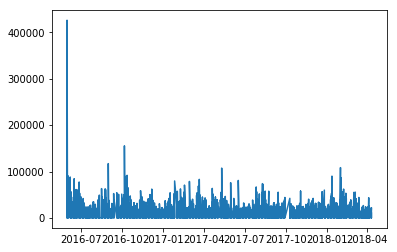

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(df.index, df.Ask)

### 02 모든 테이블 내용 추출하기
Daum의 상위 거래원 자료

In [21]:
table = dbnames[1]  # table = "stock_volume"
print(table)
cur = con.cursor()
cur.execute("SELECT sql FROM   sqlite_master WHERE name='"+table+"';")

data = [data  for data in cur]
cols = data[0][0].split('\n')[1:-1]         # '\n' 으로 나눈 나머지를 추출
cols = [col.split('"')[1]  for col in cols] # '"'  으로 추출한 컬럼만 출력
cols

stock_trader


['Date', 'Code', '개인', '외국인계', '기관계', '증권', '투신', '은행', '종금', '보험', '기금', '기타']

In [22]:
#cur.execute("Select  *  from  "+table+"  where Date ='2017/09/11';")
cur.execute("Select  *  from   "+table+"   where Code ='000020.KS';")
data = [data  for data in cur]
df = pd.DataFrame(data , columns = cols)
df = df.set_index('Date')
df.index = df.index.to_datetime()
df.head(2)

/home/markbaum/Python/django/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  


,Code,개인,외국인계,기관계,증권,투신,은행,종금,보험,기금,기타
2016-05-18,000020.KS,124460,-36656,115,115,0,0,0.0,0.0,0.0,-88301.0
2016-05-19,000020.KS,890,-684,-26,4,0,-30,0.0,0.0,0.0,1.0


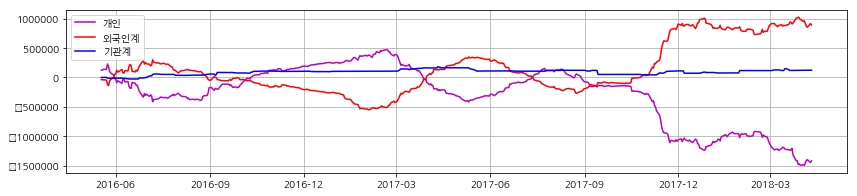

In [23]:
%matplotlib inline
import matplotlib;  import matplotlib.pyplot as plt
matplotlib.rc('font', family='NanumGothic');
plt.figure(figsize=(14,3)); plt.grid()
plt.plot(df.개인.cumsum(), 'm-')
plt.plot(df.외국인계.cumsum(), 'r-')
plt.plot(df.기관계.cumsum(), 'b-'); plt.legend()

In [24]:
cur.close()   # cursor Closed,  SQLite Connector Closed
con.close()

<br></br>
## 3 Quandl 을 활용한 금융
https://www.quandl.com/tools/python

pip install quandl

In [2]:
# WTI Crude Oil 가격자료 가져오기
import quandl
mydata = quandl.get("EIA/PET_RWTC_D")  # default : DataFrame
# mydata = quandl.get("EIA/PET_RWTC_D", returns="numpy")   # numpy 형식으로 불러오기

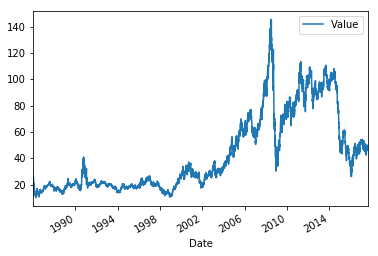

In [5]:
%matplotlib inline
mydata.plot()

<br></br>
## 4 KRX 에서 제공하는 XML 활용하기
https://kasp.krx.co.kr/contents/02/02010000/ASP02010000.jsp

In [8]:
# http://asp1.krx.co.kr/servlet/krx.asp.XMLSiseEng?code=기업코드 
# 영문 서비스가 모든 회사정보 다 제공 (한글은 '삼성전자'등 대형 상장사가 오히려 없네.. )

In [10]:
import requests
response = requests.get("http://asp1.krx.co.kr/servlet/krx.asp.XMLSiseEng?code=005930")
response.text[:300] # XML 파일 그대로 불러옴

'\n<?xml version="1.0" encoding="utf-8" ?>\n<stockprice querytime="2017-09-12 21:30:32" >\n<TBL_DailyStock>\n <DailyStock day_Date="17/09/12" day_EndPrice="2,480,000" day_Dungrak="5" day_getDebi="10,000" day_Start="2,510,000" day_High="2,511,000" day_Low="2,457,000" day_Volume="240,595" day_getAmount="59'

In [ ]:
residual

<br></br>
## 4 SQLite DB with Pandas
pandas.DataFrame.to_sql()

In [ ]:
# DataFrame.to_sql('테이블이름', cursor)
# con = sqlite3.connect("./Sql/krxDB.db")
# df.to_sql('stock_volume', con, index=False)   # 데이터 삽입
# df.to_sql(table, con, if_exists = 'append')   # 데이터 하단추가
# con.commit(); con.close()

<br></br>
## 5 Stock Price
pandas.DataFrame.to_sql()

In [ ]:
import pandas as pd
df = pd.read_csv('./Sql/stock_price.csv',encoding='ms949')

In [17]:
df[df.Date == '2017-08-18'].tail()

,Date,Code,Open,High,Low,Close,Volume
2479467,2017-08-18,005430.KS,48650,48650,47400,47900,13556
2479730,2017-08-18,073560.KQ,2815,2835,2775,2790,650026
2481620,2017-08-18,053270.KQ,1965,2010,1925,1995,37946
2483510,2017-08-18,084990.KQ,103000,103600,102300,103500,41946
2485035,2017-08-18,069640.KS,12250,12550,12100,12450,25926


In [18]:
# yahoo-api 에서 가격정보 가져오기
def stock_price(codes):
    from pandas_datareader import get_data_yahoo
    from time import time
    import pandas as pd
    t0 = time(); result = []; errors = []
    for i, code in enumerate(codes):
        try:
            df = get_data_yahoo(code)
            df = df.drop(df.columns[4], axis=1)
            df.reset_index(inplace=True) # index 를 column으로 추출
            df.insert(1,'Code',code)
            result.append(df)
        except:
            errors.append(codes)
    df = pd.concat(result,axis=0)
    for col in df.columns[2:]:
        df[col] = list(map(lambda x : int(x), df[col]))
    df.reset_index(drop=True, inplace=True)
    return df

In [3]:
import pickle
codes = pickle.load(open('./Sql/codes.p','rb'))
#codes = codes[:2]
codes

['034590.KS',
 '060230.KQ',
 '065560.KQ',
 '020150.KS',
 '014830.KS',
 '019170.KS',
 '003850.KS',
 '023760.KQ',
 '014790.KS',
 '175140.KQ',
 '160550.KQ',
 '038460.KQ',
 '101160.KQ',
 '230980.KQ',
 '096690.KQ',
 '068330.KQ',
 '039200.KQ',
 '039490.KS',
 '079430.KS',
 '086520.KQ',
 '032190.KQ',
 '136480.KQ',
 '127120.KQ',
 '000650.KS',
 '072520.KQ',
 '095720.KS',
 '079170.KQ',
 '109820.KQ',
 '010770.KS',
 '041920.KQ',
 '065160.KQ',
 '064550.KQ',
 '900070.KQ',
 '195440.KQ',
 '039440.KQ',
 '019570.KQ',
 '177830.KQ',
 '003460.KS',
 '123100.KQ',
 '101400.KQ',
 '045890.KQ',
 '052710.KQ',
 '038110.KQ',
 '005850.KS',
 '033560.KQ',
 '192530.KS',
 '078140.KQ',
 '041520.KQ',
 '138690.KQ',
 '230240.KQ',
 '102260.KS',
 '000060.KS',
 '039830.KQ',
 '035480.KQ',
 '024660.KQ',
 '083570.KS',
 '232140.KQ',
 '001530.KS',
 '009410.KS',
 '007280.KS',
 '166090.KQ',
 '197210.KQ',
 '006650.KS',
 '001440.KS',
 '208140.KQ',
 '181710.KS',
 '037070.KQ',
 '098660.KQ',
 '001720.KS',
 '063760.KQ',
 '004270.KS',
 '0153

In [ ]:
# df.to_csv('./Sql/stock_price.csv', index=None, encoding='ms949')
print('done....')
del df